# Tutorial 2

In [3]:
from maxplotlib import Canvas

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
c = Canvas(width=800, ratio=0.5)
tikz = c.add_tikzfigure(grid=False)

# Add nodes
tikz.add_node(0, 0, "A", shape="circle", draw="black", fill="blue", layer=0)
tikz.add_node(1, 0, "B", shape="circle", draw="black", fill="blue", layer=0)
tikz.add_node(1, 1, "C", shape="circle", draw="black", fill="blue", layer=0)
tikz.add_node(0, 1, "D", shape="circle", draw="black", fill="blue", layer=2)


# Add a line between nodes
tikz.add_path(
    ["A", "B", "C", "D"],
    path_actions=["draw", "rounded corners"],
    fill="red",
    opacity=1.0,
    cycle=True,
    layer=1,
)

tikz.add_node(0.5, 0.5, content="Cube", layer=10)

# tikz.compile_pdf("tutorial_02_01.pdf")
#

AttributeError: 'TikzFigure' object has no attribute 'add_path'

yo
layer = <tikzpics.layer.Tikzlayer object at 0x11338cbf0>
Layer: 
% Layer 0
\begin{pgfonlayer}{0}
\node[shape=circle, draw=black, fill=blue!20] (A) at (-5, 0) {Origin node};
\node[shape=rectangle, draw=red, fill=red] (C) at (2, 5) {};
\end{pgfonlayer}{0}

layer = <tikzpics.layer.Tikzlayer object at 0x118e677d0>
Layer: 
% Layer 1
\begin{pgfonlayer}{1}
\node[shape=rectangle, draw=red, fill=white] (B) at (2, 2) {$a^2 + b^2 = c^2$};
\end{pgfonlayer}{1}

layer = <tikzpics.layer.Tikzlayer object at 0x118e67830>
Layer: 
% Layer -10
\begin{pgfonlayer}{-10}
\node[shape=rectangle, draw=red, fill=red] (node3) at (-1, 5) {};
\end{pgfonlayer}{-10}

layer = <tikzpics.layer.Tikzlayer object at 0x118e4e690>





Layer: 
% Layer -5
\begin{pgfonlayer}{-5}
\draw[color=green, style=solid, line width=2] (A) to (B) to (C) to (A) to (node3);
\end{pgfonlayer}{-5}

[<tikzpics.node.Node object at 0x118e80370>, <tikzpics.node.Node object at 0x1189f36b0>, <tikzpics.node.Node object at 0x119419db0>, <tikzpics.no

(<Figure size 2362.2x1181.1 with 2 Axes>,
 array([[<Axes: >, <Axes: xlabel='(x - 10) * 0.1', ylabel='10y'>]],
       dtype=object))

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


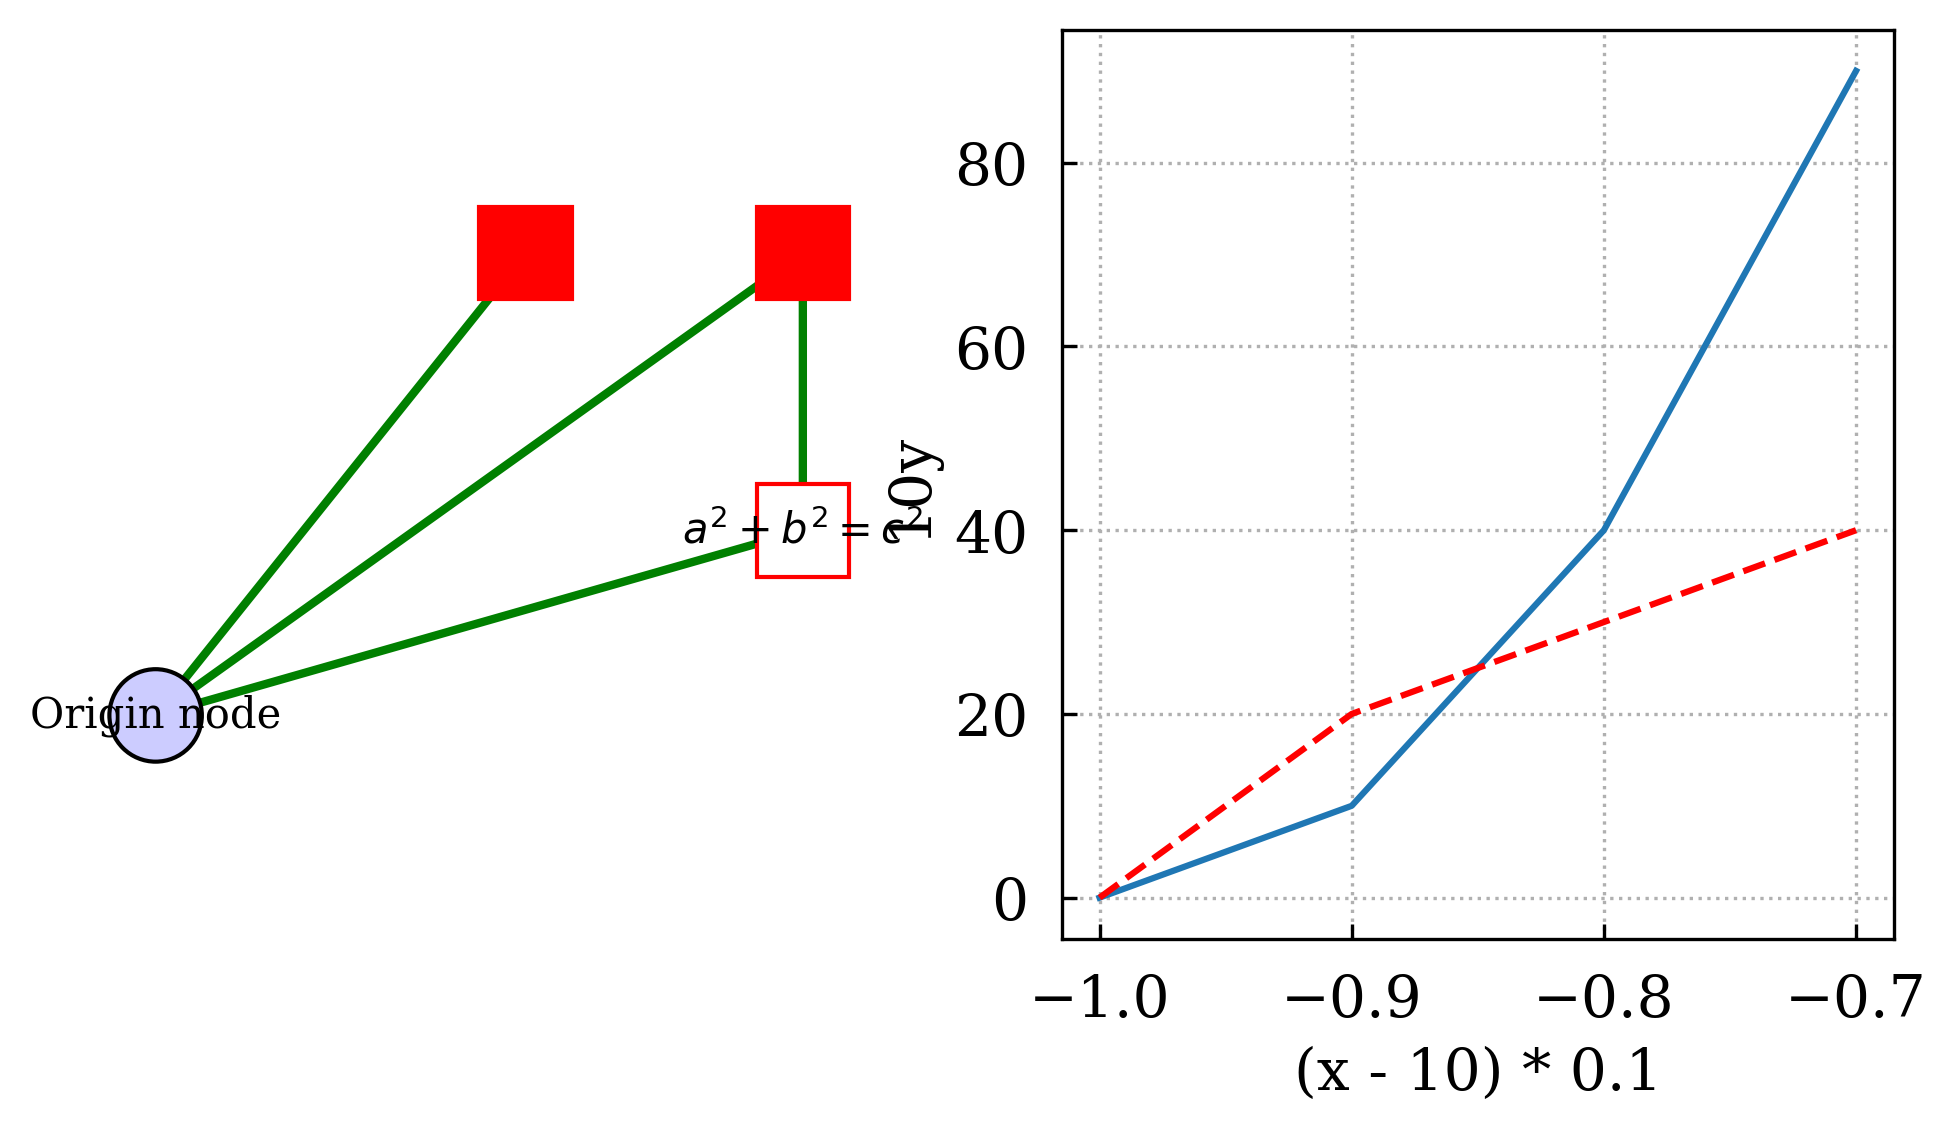

In [27]:
c = Canvas(ncols=2, width="20cm", ratio=0.5)
tikz = c.add_tikzfigure(grid=False)

# Add nodes
node_a = tikz.add_node(
    -5,
    0,
    label="A",
    content="Origin node",
    shape="circle",
    draw="black",
    fill="blue!20",
)
tikz.add_node(
    2,
    2,
    label="B",
    content="$a^2 + b^2 = c^2$",
    shape="rectangle",
    draw="red",
    fill="white",
    layer=1,
)
tikz.add_node(2, 5, label="C", shape="rectangle", draw="red", fill="red")
last_node = tikz.add_node(-1, 5, shape="rectangle", draw="red", fill="red", layer=-10)

# # Add a line between nodes
tikz.draw(
    [node_a.label, "B", "C", "A", last_node],
    color="green",
    style="solid",
    line_width="2",
    layer=-5,
)

sp = c.add_subplot(
    grid=True, xlabel="(x - 10) * 0.1", ylabel="10y", yscale=10, xshift=-10, xscale=0.1
)
sp.add_line([0, 1, 2, 3], [0, 1, 4, 9], label="Line 1")
sp.add_line([0, 1, 2, 3], [0, 2, 3, 4], linestyle="dashed", color="red", label="Line 2")

# Generate the TikZ script
# print(tikz.generate_standalone())

# tikz.compile_pdf("tutorial_02_02.pdf")

c.plot(backend="matplotlib")

In [ ]:
c = Canvas(width=800, ratio=0.5)
tikz = c.add_tikzfigure(grid=False)

# Add nodes
tikz.add_node(0, 0, "A")
tikz.add_node(10, 0, "B")


# Add a line between nodes
tikz.add_path(["A", "B"], path_actions=["->"], out=30)

# Generate the TikZ script
# script = tikz.generate_tikz()
# print(script)
print(tikz.generate_standalone())
# tikz.compile_pdf("tutorial_02_03.pdf")

\documentclass[border=10pt]{standalone}
\usepackage{tikz}
\begin{document}
\begin{tikzpicture}
    % Define the layers library
    \pgfdeclarelayer{0}
    \pgfsetlayers{0}
    
    % Layer 0
    \begin{pgfonlayer}{0}
        \node (A) at (0, 0) {};
        \node (B) at (10, 0) {};
        \draw[->, out=30] (A.center) to (B.center);
    \end{pgfonlayer}{0}
\end{tikzpicture}

\end{document}
